# Data Analysis Titanic.

### Loading data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading data.
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring the data.

In [5]:
#Columns names.
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Data size.
train.shape

(891, 12)

In [7]:
#Are there null values?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are some missing values in 'Age', 'Cabin' and 'Embarked'.

In [8]:
#Numeric variables distribution.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Categorical variables.
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Exploratory Data Analysis.

### Age:

C:\Users\Ignacio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

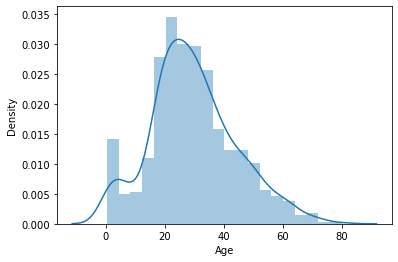

In [10]:
sns.distplot(train['Age'])

From the shape of the graph we can conclude that it has a normal distribution.

<AxesSubplot:xlabel='Age'>

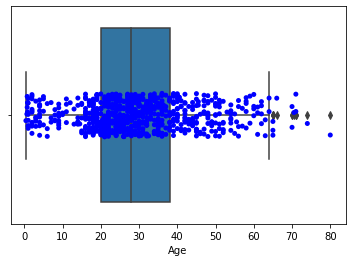

In [11]:
sns.boxplot(x='Age',data=train)
sns.stripplot(x='Age',data=train,color='b')

With this we can realize that in the age range from 0 to 60... there is uniformity.

### Fare:

C:\Users\Ignacio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

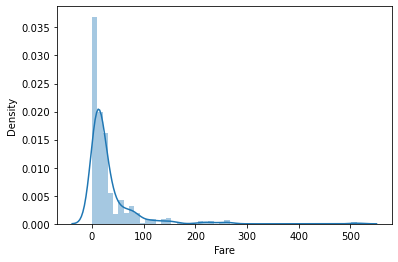

In [12]:
sns.distplot(train['Fare'])

But in the case of the fare it is more skewed.

C:\Users\Ignacio\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare'>

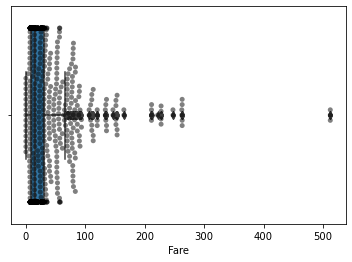

In [27]:
sns.boxplot(x='Fare',data=train)
sns.swarmplot(x='Fare',data=train,color='k',alpha=0.5)

By observing we can conclude that the majority of passengers had a cheap ticket (0-30).

### Survived:

<AxesSubplot:xlabel='Survived', ylabel='count'>

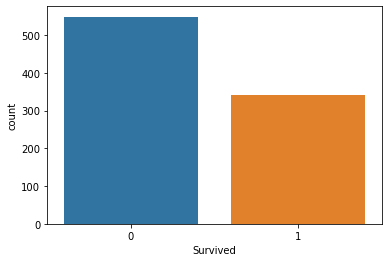

In [14]:
sns.countplot(x='Survived',data=train)

This show us that there were fewer survivors.

In [15]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [16]:
#Now adding sex.
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [17]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']

In [18]:
grouped_sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

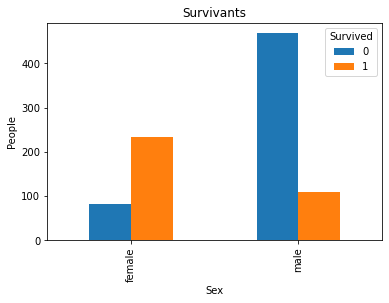

In [19]:
#Bars Graph
(grouped_sex.unstack(level=0)).plot.bar()

plt.title('Survivants')
plt.ylabel('People')

plt.show()

once we divide the graph by gender we can see that the majority of survivors were women, therefore the majority of non-survivors were men.

### Class and Embarked:

In [20]:
train.groupby(['Pclass']).count()['PassengerId']

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [21]:
train.groupby(['Pclass','Embarked']).count()['PassengerId']

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: PassengerId, dtype: int64

In [22]:
grouped_C_E = train.groupby(['Pclass','Embarked']).count()['PassengerId']

In [23]:
grouped_C_E.unstack(level=0)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


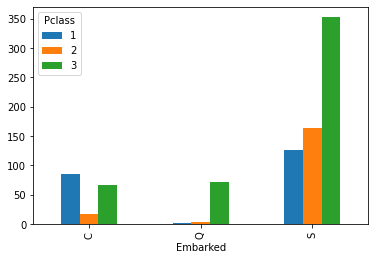

In [24]:
(grouped_C_E.unstack(level=0).plot.bar())
plt.show()

### Fare vs Age:

<AxesSubplot:xlabel='Age', ylabel='Fare'>

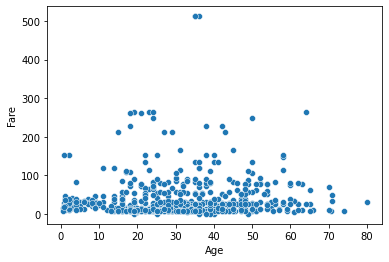

In [30]:
sns.scatterplot(x='Age',y='Fare',data=train)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

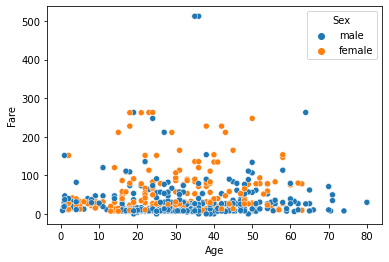

In [31]:
sns.scatterplot(x='Age',y='Fare',data=train,hue='Sex')

Is there correlation between this two variables?

In [28]:
corr = train[['Age','Fare']].corr()

In [29]:
corr

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


<AxesSubplot:>

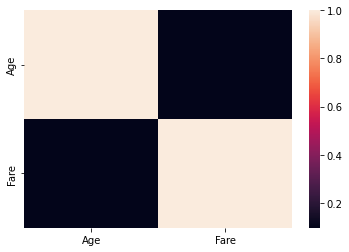

In [30]:
sns.heatmap(data=corr)

no XD

### Fare vs Survived

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

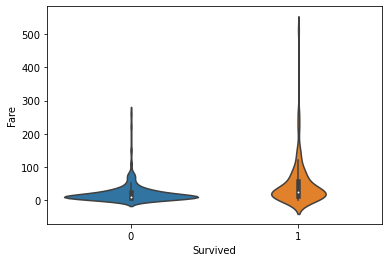

In [31]:
sns.violinplot(x='Survived',y='Fare',data=train)

### Correlation between all variables:

In [32]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [33]:
corr_1 = train.corr()

<AxesSubplot:>

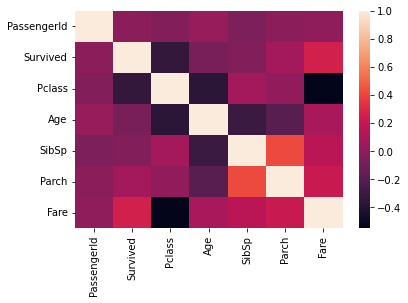

In [34]:
sns.heatmap(corr_1)

From the following graph we can conclude that there is no relationship between class and passenger survival.

### Summarization.

We have learned that:
* There is no relationship between class and passemger survival.
* There is no correlation between 'Fare' and the 'Age'.
*  the majority of survivors were women.
    
What we need to do:
* Fill the null values in 'Age'.
* Change the 'Sex' to a float type.